### Importar bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import mlflow
import mlflow.sklearn

### Data Set

In [7]:
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [9]:
for col in credito.columns:
    if credito[col].dtype == "object":
        credito[col] = credito[col].astype('category').cat.codes

In [11]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6.0,1,6,1169.0,4,3,4.0,3,2,...,3,67.0,1,1,2.0,1,1.0,1,1,1
1,0,48.0,3,6,5951.0,2,0,2.0,0,2,...,3,22.0,1,1,1.0,1,1.0,0,1,0
2,3,12.0,1,2,2096.0,2,1,2.0,3,2,...,3,49.0,1,1,1.0,3,2.0,0,1,1
3,1,42.0,3,3,7882.0,2,1,2.0,3,1,...,1,45.0,1,0,1.0,1,2.0,0,1,1
4,1,24.0,2,4,4870.0,2,0,3.0,3,2,...,2,53.0,1,0,2.0,1,2.0,0,1,0


### Seprar conjuntos train e test

In [14]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.3, random_state=123)

### Treinamento do Algoritmo

In [21]:
def treinar_RF(n_estimators):
    # Criar experimento
    mlflow.set_experiment("RandomForest_experimento")
    
    # Run do experimento
    with mlflow.start_run():
        RF = RandomForestClassifier(n_estimators=n_estimators)
        RF.fit(X_train, y_train)
        previsoes = RF.predict(X_test)

        # salvar no mlflow os logs de hiperparametros de treinamento
        mlflow.log_param("n_estimators", n_estimators)
    
        #métricas
        acuracia = accuracy_score(y_test, previsoes)
        recall = recall_score(y_test, previsoes)
        precision = precision_score(y_test, previsoes)
        f1 = f1_score(y_test, previsoes)
        auc = roc_auc_score(y_test, previsoes)
        log = log_loss(y_test, previsoes)
    
        #registrar métricas
        mlflow.log_metric("acuracia", acuracia)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("f1", f1)
        mlflow.log_metric("auc", auc)
        mlflow.log_metric("log", log)
        
        #matriz de confusao
        cm = confusion_matrix(y_test, previsoes)
        confusion_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        confusion_disp.plot() #Exibe a matriz de confusao
        plt.savefig("confusion.png") #salva o grafico da matriz de confusao
    
        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, RF.predict_proba(X_test)[:, 1]) # Calcula a curva ROC
        roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
        roc_disp.plot() #Exibe a curva ROC
        plt.savefig("roc.png") #Salva o grafico da curva ROC
    
        #Logar graficos
        mlflow.log_artifact("confusion.png")
        mlflow.log_artifact("roc.png")
    
        #salavndo o modelo
        mlflow.sklearn.log_model(RF, "ModeloRandomForest")
    
        #informacoes da execucao
        print("Modelo: ", mlflow.active_run().info.run_uuid)
    mlflow.end_run()

2025/03/23 16:53:48 INFO mlflow.tracking.fluent: Experiment with name 'RandomForest_experimento' does not exist. Creating a new experiment.
C:\Users\MASTER\anaconda3\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")
2025/03/23 16:53:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo:  d50df4f344f343ffbf83f8252780425f


C:\Users\MASTER\anaconda3\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")
2025/03/23 16:53:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo:  ab5744037eab44c39142f2728f5e727c


C:\Users\MASTER\anaconda3\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")
2025/03/23 16:54:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo:  035c76a832ff42a29cdb3e5e5656eb9f


C:\Users\MASTER\anaconda3\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:171: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")
2025/03/23 16:54:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Modelo:  32aa1b53b4db46ec82983f90b83f18ab


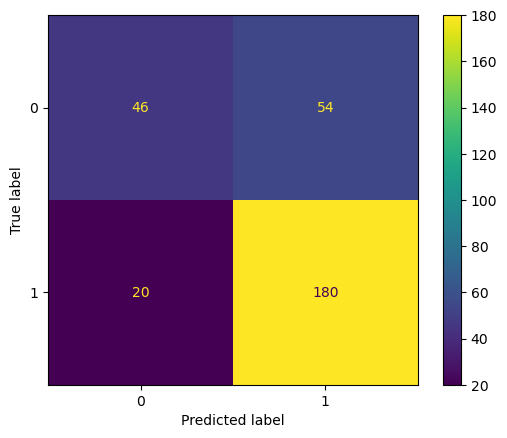

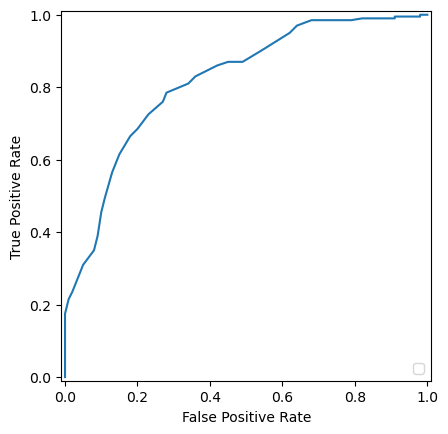

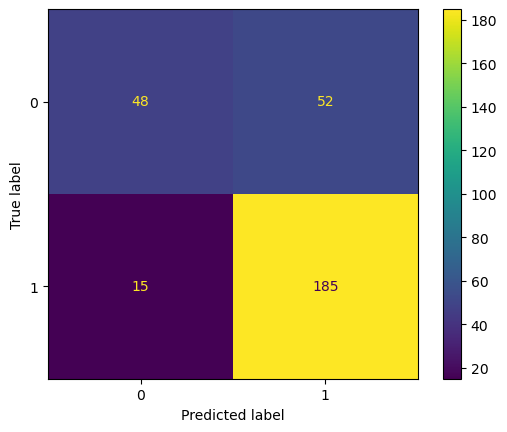

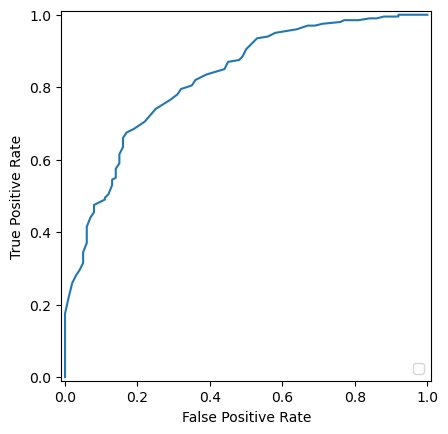

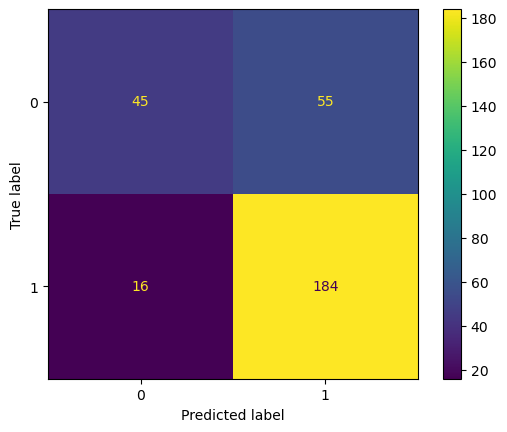

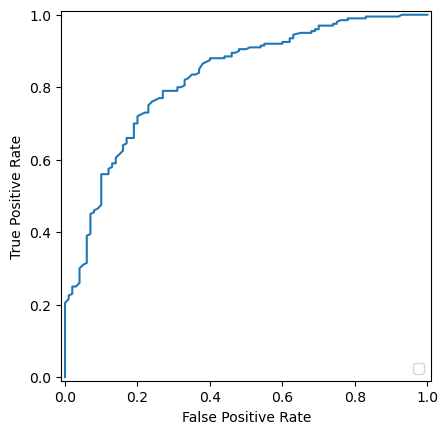

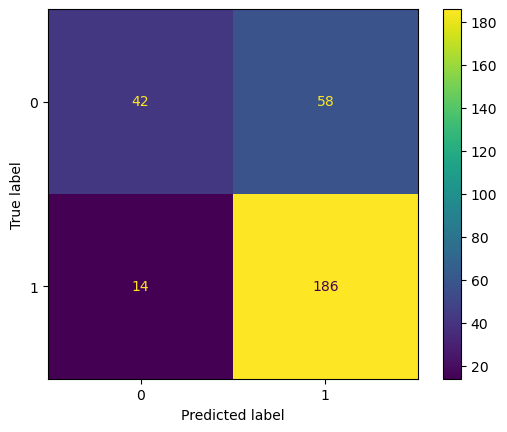

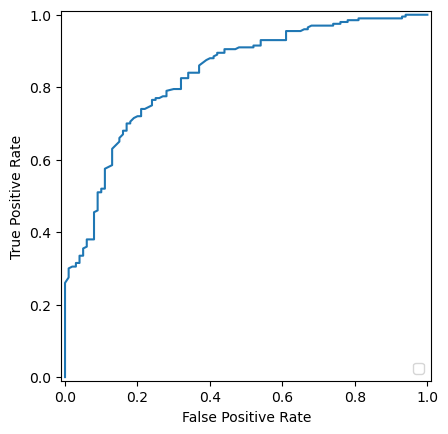

In [23]:
arvores = [50, 100, 500, 750]
for n in arvores:
    treinar_RF(n)